In [1]:
#import libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot

import statistics

In [2]:
data = pd.read_csv('datasets/data.csv',index_col=0)
data['Date'] = pd.to_datetime(data['Date'])
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Year,Month,Week
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315,2010,2,5
1,1,2,2010-02-05,50605.27,False,42.31,2.572,211.096358,8.106,A,151315,2010,2,5
2,1,3,2010-02-05,13740.12,False,42.31,2.572,211.096358,8.106,A,151315,2010,2,5
3,1,4,2010-02-05,39954.04,False,42.31,2.572,211.096358,8.106,A,151315,2010,2,5
4,1,5,2010-02-05,32229.38,False,42.31,2.572,211.096358,8.106,A,151315,2010,2,5


## Train/test data split

In [3]:
#Encoding categorical variables
data['IsHoliday'] = [1 if x == True else 0 for x in data['IsHoliday']]

In [4]:
data_dummies=pd.get_dummies(data,drop_first=True)

In [5]:
data_dummies.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Size,Year,Month,Week,Type_B,Type_C
0,1,1,2010-02-05,24924.50,0,42.31,2.572,211.096358,8.106,151315,2010,2,5,0,0
1,1,2,2010-02-05,50605.27,0,42.31,2.572,211.096358,8.106,151315,2010,2,5,0,0
2,1,3,2010-02-05,13740.12,0,42.31,2.572,211.096358,8.106,151315,2010,2,5,0,0
3,1,4,2010-02-05,39954.04,0,42.31,2.572,211.096358,8.106,151315,2010,2,5,0,0
4,1,5,2010-02-05,32229.38,0,42.31,2.572,211.096358,8.106,151315,2010,2,5,0,0


In [6]:
X = data_dummies.drop(columns=['Weekly_Sales','Date'])
y = data_dummies['Weekly_Sales']

In [7]:
X.shape

(421570, 13)

In [8]:
y.shape

(421570,)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [10]:
print(len(X_train),len(X_test),len(y_train),len(y_test))

316177 105393 316177 105393


## Feature Scaling

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
np.set_printoptions(precision=5)

## Model building

#### Decision Tree Regressor

In [12]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=0)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [13]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math

print(f"Mean absolute error:{mean_absolute_error(y_test, y_pred_dt): .2f}")
print(f"Mean squared error:{mean_squared_error(y_test, y_pred_dt): .2f}")
print(f"Root Mean squared error: {math.sqrt(mean_squared_error(y_test, y_pred_dt)) :.2f}")
print(f'Variance score: {r2_score(y_test, y_pred_dt):.2f}')

Mean absolute error: 1866.08
Mean squared error: 24282499.13
Root Mean squared error: 4927.73
Variance score: 0.95


#### Random Forest Regressor

In [14]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [15]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math

print(f"Mean absolute error:{mean_absolute_error(y_test, y_pred_rf): .2f}")
print(f"Mean squared error:{mean_squared_error(y_test, y_pred_rf): .2f}")
print(f"Root Mean squared error: {math.sqrt(mean_squared_error(y_test, y_pred_rf)) :.2f}")
print(f'Variance score: {r2_score(y_test, y_pred_rf):.2f}')

Mean absolute error: 1441.77
Mean squared error: 14276709.34
Root Mean squared error: 3778.45
Variance score: 0.97


#### XGBoost Regressor

In [16]:
from xgboost import XGBRegressor
xg = XGBRegressor()
xg.fit(X_train, y_train)
y_pred_xg = xg.predict(X_test)

In [17]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math

print(f"Mean absolute error:{mean_absolute_error(y_test, y_pred_xg): .2f}")
print(f"Mean squared error:{mean_squared_error(y_test, y_pred_xg): .2f}")
print(f"Root Mean squared error: {math.sqrt(mean_squared_error(y_test, y_pred_xg)) :.2f}")
print(f'Variance score: {r2_score(y_test, y_pred_xg):.2f}')

Mean absolute error: 2949.10
Mean squared error: 29770585.84
Root Mean squared error: 5456.24
Variance score: 0.94


#### Linear Regression

In [18]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [19]:
print(f"Mean absolute error:{mean_absolute_error(y_test, y_pred_lr): .2f}")
print(f"Mean squared error:{mean_squared_error(y_test, y_pred_lr): .2f}")
print(f"Root Mean squared error: {math.sqrt(mean_squared_error(y_test, y_pred_lr)) :.2f}")
print(f'Variance score: {r2_score(y_test, y_pred_lr):.2f}')

Mean absolute error: 14569.17
Mean squared error: 477646006.66
Root Mean squared error: 21855.11
Variance score: 0.09


#### Lasso Regression

In [20]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train,y_train)
y_pred_lasso = lasso.predict(X_test)

In [21]:
print(f"Mean absolute error:{mean_absolute_error(y_test, y_pred_lasso): .2f}")
print(f"Mean squared error:{mean_squared_error(y_test, y_pred_lasso): .2f}")
print(f"Root Mean squared error: {math.sqrt(mean_squared_error(y_test, y_pred_lasso)) :.2f}")
print(f'Variance score: {r2_score(y_test, y_pred_lasso):.2f}')

Mean absolute error: 14567.96
Mean squared error: 477640670.00
Root Mean squared error: 21854.99
Variance score: 0.09


#### Gradient Boosting Regressor

In [22]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

In [23]:
print(f"Mean absolute error:{mean_absolute_error(y_test, y_pred_gb): .2f}")
print(f"Mean squared error:{mean_squared_error(y_test, y_pred_gb): .2f}")
print(f"Root Mean squared error: {math.sqrt(mean_squared_error(y_test, y_pred_gb)) :.2f}")
print(f'Variance score: {r2_score(y_test, y_pred_gb):.2f}')

Mean absolute error: 6764.14
Mean squared error: 136646566.56
Root Mean squared error: 11689.59
Variance score: 0.74


#### AdaBoost Regressor

In [24]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)

In [25]:
print(f"Mean absolute error:{mean_absolute_error(y_test, y_pred_ada): .2f}")
print(f"Mean squared error:{mean_squared_error(y_test, y_pred_ada): .2f}")
print(f"Root Mean squared error: {math.sqrt(mean_squared_error(y_test, y_pred_ada)) :.2f}")
print(f'Variance score: {r2_score(y_test, y_pred_ada):.2f}')

Mean absolute error: 17383.95
Mean squared error: 465100050.92
Root Mean squared error: 21566.18
Variance score: 0.11


## PCA

In [26]:
#Applying PCA
from sklearn.decomposition import PCA
pca = PCA(0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

#### Decision Tree + PCA

In [27]:
#Training the Decision Tree regression model
from sklearn.tree import DecisionTreeRegressor
dt_pca = DecisionTreeRegressor(random_state=0)
dt_pca.fit(X_train_pca, y_train)
y_pred_dt_pca = dt_pca.predict(X_test_pca)

In [28]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math

print(f"Mean absolute error:{mean_absolute_error(y_test, y_pred_dt_pca): .2f}")
print(f"Mean squared error:{mean_squared_error(y_test, y_pred_dt_pca): .2f}")
print(f"Root Mean squared error: {math.sqrt(mean_squared_error(y_test, y_pred_dt_pca)) :.2f}")
print(f'Variance score: {r2_score(y_test, y_pred_dt_pca):.2f}')

Mean absolute error: 3092.85
Mean squared error: 99903935.62
Root Mean squared error: 9995.20
Variance score: 0.81


#### Random Forest + PCA

In [29]:
#Training the Random Forest regression model
from sklearn.ensemble import RandomForestRegressor
rf_pca = RandomForestRegressor(random_state=0)
rf_pca.fit(X_train_pca, y_train)
y_pred_rf_pca = rf_pca.predict(X_test_pca)

In [30]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math

print(f"Mean absolute error:{mean_absolute_error(y_test, y_pred_rf_pca): .2f}")
print(f"Mean squared error:{mean_squared_error(y_test, y_pred_rf_pca): .2f}")
print(f"Root Mean squared error: {math.sqrt(mean_squared_error(y_test, y_pred_rf_pca)) :.2f}")
print(f'Variance score: {r2_score(y_test, y_pred_rf_pca):.2f}')

Mean absolute error: 2510.81
Mean squared error: 53907718.50
Root Mean squared error: 7342.19
Variance score: 0.90


#### XGBoost + PCA

In [31]:
#Training the XGBRegressor regression model
from xgboost import XGBRegressor
xg_pca = XGBRegressor()
xg_pca.fit(X_train_pca, y_train)
y_pred_xg_pca = xg_pca.predict(X_test_pca)

In [32]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math

print(f"Mean absolute error:{mean_absolute_error(y_test, y_pred_xg_pca): .2f}")
print(f"Mean squared error:{mean_squared_error(y_test, y_pred_xg_pca): .2f}")
print(f"Root Mean squared error: {math.sqrt(mean_squared_error(y_test, y_pred_xg_pca)) :.2f}")
print(f'Variance score: {r2_score(y_test, y_pred_xg_pca):.2f}')


Mean absolute error: 7064.44
Mean squared error: 148850501.15
Root Mean squared error: 12200.43
Variance score: 0.72


## Feature Importance

#### Feature Importance + Decision Tree

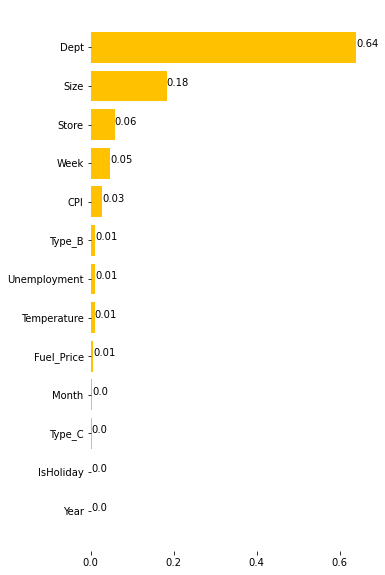

In [33]:
#feature importance on Decision Tree
plt.figure(figsize=(5,10))
sorted_idx_dt = dt.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx_dt],dt.feature_importances_[sorted_idx_dt],color='#FFC100')

for index, value in enumerate(dt.feature_importances_[sorted_idx_dt]):
    plt.text(value, index,
             str(round(value,2)))

plt.rcParams.update({'font.size': 20})
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.savefig('Top 5 feature importance on Decision Tree.png', bbox_inches='tight')
plt.show()

In [34]:
X_dt = data_dummies[['Dept','Size','Store','Week','CPI']]
y_dt = data_dummies['Weekly_Sales']

In [35]:
from sklearn.model_selection import train_test_split
X_dt_train, X_dt_test, y_dt_train, y_dt_test = train_test_split(X_dt, y_dt, test_size = 0.25)

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_dt_train = scaler.fit_transform(X_dt_train)
X_dt_test = scaler.transform(X_dt_test)
np.set_printoptions(precision=5)

In [37]:
from sklearn.tree import DecisionTreeRegressor
dt_fi = DecisionTreeRegressor()#random_state=42
dt_fi.fit(X_dt_train, y_dt_train)
y_pred_dt_fi = dt_fi.predict(X_dt_test)

In [38]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math

print(f"Mean absolute error:{mean_absolute_error(y_dt_test, y_pred_dt_fi): .2f}")
print(f"Mean squared error:{mean_squared_error(y_dt_test, y_pred_dt_fi): .2f}")
print(f"Root Mean squared error: {math.sqrt(mean_squared_error(y_dt_test, y_pred_dt_fi)) :.2f}")
print(f'Variance score: {r2_score(y_dt_test, y_pred_dt_fi):.2f}')

Mean absolute error: 1766.60
Mean squared error: 22698327.54
Root Mean squared error: 4764.28
Variance score: 0.96


#### Feature Importance + Random Forest

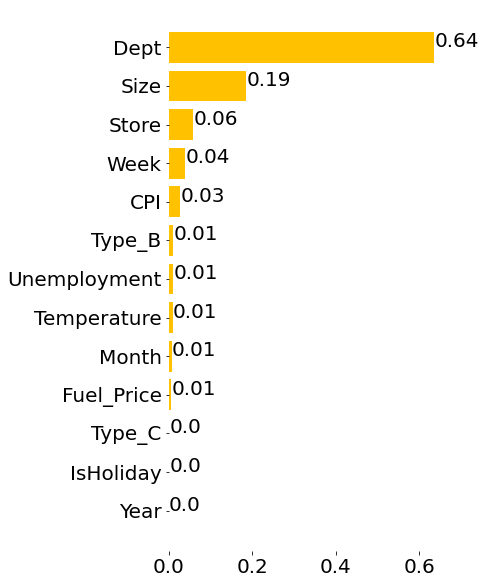

In [39]:
#feature importance on Random Forest
plt.figure(figsize=(5,10))
sorted_idx_rf = rf.feature_importances_.argsort()
sorted_idx_rf = sorted_idx_rf
plt.barh(X.columns[sorted_idx_rf],rf.feature_importances_[sorted_idx_rf],color='#FFC100')

for index, value in enumerate(rf.feature_importances_[sorted_idx_rf]):
    plt.text(value, index,
             str(round(value,2)))

plt.rcParams.update({'font.size': 20})
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.savefig('Top 5 feature importance on Random Forest.png', bbox_inches='tight')
plt.show()

In [40]:
X_rf = data_dummies[['Dept','Size','Store','Week','CPI']]
y_rf = data_dummies['Weekly_Sales']

In [41]:
from sklearn.model_selection import train_test_split
X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(X_rf, y_rf, test_size = 0.25)

In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_rf_train = scaler.fit_transform(X_rf_train)
X_rf_test = scaler.transform(X_rf_test)
np.set_printoptions(precision=5)

In [43]:
#Training the Random Forest regression model
from sklearn.ensemble import RandomForestRegressor
rf_fi = RandomForestRegressor()
rf_fi.fit(X_rf_train, y_rf_train)
y_pred_rf_fi = rf_fi.predict(X_rf_test)

In [44]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math

print(f"Mean absolute error:{mean_absolute_error(y_rf_test, y_pred_rf_fi): .2f}")
print(f"Mean squared error:{mean_squared_error(y_rf_test, y_pred_rf_fi): .2f}")
print(f"Root Mean squared error: {math.sqrt(mean_squared_error(y_rf_test, y_pred_rf_fi)) :.2f}")
print(f'Variance score: {r2_score(y_rf_test, y_pred_rf_fi):.2f}')

Mean absolute error: 1426.79
Mean squared error: 12234154.68
Root Mean squared error: 3497.74
Variance score: 0.98


#### Feature Importance + XGBoost

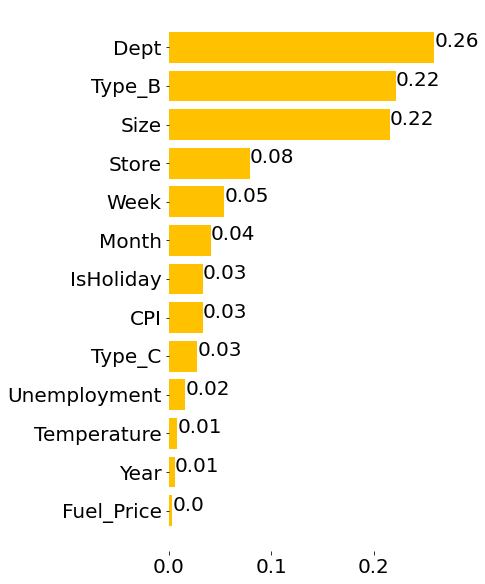

In [45]:
#feature importance on XGBoost
plt.figure(figsize=(5,10))
sorted_idx_xg = xg.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx_xg],xg.feature_importances_[sorted_idx_xg],color='#FFC100')

for index, value in enumerate(xg.feature_importances_[sorted_idx_xg]):
    plt.text(value, index,
             str(round(value,2)))

plt.rcParams.update({'font.size': 20})
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.savefig('Top 5 feature importance on XGBoost.png', bbox_inches='tight')
plt.show()

In [46]:
X_xg = data_dummies[['Dept','Size','Type_B','Store','Month','Week']]
y_xg = data_dummies['Weekly_Sales']

In [47]:
from sklearn.model_selection import train_test_split
X_xg_train, X_xg_test, y_xg_train, y_xg_test = train_test_split(X_xg, y_xg, test_size = 0.25)

In [48]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_xg_train = scaler.fit_transform(X_xg_train)
X_xg_test = scaler.transform(X_xg_test)
np.set_printoptions(precision=5)

In [49]:
from xgboost import XGBRegressor
xg_fi = XGBRegressor()
xg_fi.fit(X_xg_train, y_xg_train)
y_pred_xg_fi = xg_fi.predict(X_xg_test)

In [50]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math

print(f"Mean absolute error:{mean_absolute_error(y_xg_test, y_pred_xg_fi): .2f}")
print(f"Mean squared error:{mean_squared_error(y_xg_test, y_pred_xg_fi): .2f}")
print(f"Root Mean squared error: {math.sqrt(mean_squared_error(y_xg_test, y_pred_xg_fi)) :.2f}")
print(f'Variance score: {r2_score(y_xg_test, y_pred_xg_fi):.2f}')

Mean absolute error: 2939.37
Mean squared error: 28228980.87
Root Mean squared error: 5313.10
Variance score: 0.95


## Hyper Paramter Tuning (HPO)

#### HPO + Decision Tree (after feature importance)

In [51]:
dt_params = {"min_samples_split": [5, 10, 15, 20],
              "max_depth": [20, 40, 60, 80, 100],
              "min_samples_leaf": [5, 10, 15, 20],
              "max_leaf_nodes": [20, 40, 60, 80, 100],
              }

In [52]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [53]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [54]:
from sklearn.tree import DecisionTreeRegressor
dt_new_fi = DecisionTreeRegressor()#random_state=42

In [55]:
random_search_dt_fi = RandomizedSearchCV(dt_new_fi,param_distributions=dt_params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [66]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search_dt_fi.fit(X_dt,y_dt)
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/Users/spy1106/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/spy1106/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/spy1106/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/spy1106/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(
/Users/spy1106/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these paramet

/Users/spy1106/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/spy1106/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/spy1106/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/spy1106/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(
/Users/spy1106/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these paramet


 Time taken: 0 hours 0 minutes and 3.04 seconds.


In [67]:
X_dt.head()

,Dept,Size,Store,Week,CPI
0,1,151315,1,5,211.096358
1,2,151315,1,5,211.096358
2,3,151315,1,5,211.096358
3,4,151315,1,5,211.096358
4,5,151315,1,5,211.096358


In [68]:
random_search_dt_fi.best_estimator_

DecisionTreeRegressor(max_depth=100, max_leaf_nodes=100, min_samples_leaf=10,
                      min_samples_split=15)

In [69]:
from sklearn.tree import DecisionTreeRegressor
dt_fi = DecisionTreeRegressor(max_depth=100, max_leaf_nodes=100, min_samples_leaf=10,
                      min_samples_split=15)
dt_fi.fit(X_dt_train, y_dt_train)
y_pred_dt_fi = dt_fi.predict(X_dt_test)

In [70]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math

print(f"Mean absolute error:{mean_absolute_error(y_dt_test, y_pred_dt_fi): .2f}")
print(f"Mean squared error:{mean_squared_error(y_dt_test, y_pred_dt_fi): .2f}")
print(f"Root Mean squared error: {math.sqrt(mean_squared_error(y_dt_test, y_pred_dt_fi)) :.2f}")
print(f'Variance score: {r2_score(y_dt_test, y_pred_dt_fi):.2f}')

Mean absolute error: 6000.91
Mean squared error: 96507748.21
Root Mean squared error: 9823.84
Variance score: 0.81


#### Hyper Paramter Tuning + XGBoost (after feature importance)

In [71]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [72]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [73]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [74]:
from xgboost import XGBRegressor
xg_new_2 = XGBRegressor()

In [75]:
random_search = RandomizedSearchCV(xg_new_2,param_distributions=params,n_iter=1,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [76]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_xg,y_xg)
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/spy1106/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/spy1106/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/spy1106/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/spy1106/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(


[CV 3/5] END max_depth=20, max_leaf_nodes=60, min_samples_leaf=10, min_samples_split=20;, score=nan total time=   0.7s
[CV 5/5] END max_depth=20, max_leaf_nodes=60, min_samples_leaf=10, min_samples_split=20;, score=nan total time=   0.6s
[CV 3/5] END max_depth=80, max_leaf_nodes=100, min_samples_leaf=15, min_samples_split=20;, score=nan total time=   0.5s
[CV 1/5] END max_depth=60, max_leaf_nodes=40, min_samples_leaf=10, min_samples_split=20;, score=nan total time=   0.5s
[CV 5/5] END max_depth=60, max_leaf_nodes=60, min_samples_leaf=20, min_samples_split=5;, score=nan total time=   0.5s
[CV 3/5] END max_depth=60, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=20;, score=nan total time=   0.5s
[CV 1/5] END max_depth=100, max_leaf_nodes=100, min_samples_leaf=10, min_samples_split=15;, score=nan total time=   0.6s
[CV 1/5] END max_depth=40, max_leaf_nodes=20, min_samples_leaf=15, min_samples_split=15;, score=nan total time=   0.4s
[CV 4/5] END max_depth=100, max_leaf_nodes=20, 

/Users/spy1106/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/spy1106/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/spy1106/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/spy1106/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: continuous format is not supported

  warnings.warn(
/Users/spy1106/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these paramet

[CV 5/5] END max_depth=40, max_leaf_nodes=60, min_samples_leaf=15, min_samples_split=20;, score=nan total time=   0.8s
[CV 1/5] END max_depth=80, max_leaf_nodes=100, min_samples_leaf=15, min_samples_split=20;, score=nan total time=   0.7s
[CV 4/5] END max_depth=20, max_leaf_nodes=100, min_samples_leaf=15, min_samples_split=5;, score=nan total time=   0.6s
[CV 5/5] END max_depth=60, max_leaf_nodes=40, min_samples_leaf=10, min_samples_split=20;, score=nan total time=   0.5s
[CV 3/5] END max_depth=100, max_leaf_nodes=100, min_samples_leaf=5, min_samples_split=20;, score=nan total time=   0.6s
[CV 1/5] END max_depth=60, max_leaf_nodes=60, min_samples_leaf=15, min_samples_split=5;, score=nan total time=   0.5s
[CV 2/5] END max_depth=40, max_leaf_nodes=20, min_samples_leaf=20, min_samples_split=10;, score=nan total time=   0.4s
[CV 3/5] END max_depth=40, max_leaf_nodes=20, min_samples_leaf=15, min_samples_split=15;, score=nan total time=   0.4s
[CV 5/5] END max_depth=100, max_leaf_nodes=20, 

In [77]:
X.head()

,Store,Dept,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Size,Year,Month,Week,Type_B,Type_C
0,1,1,0,42.31,2.572,211.096358,8.106,151315,2010,2,5,0,0
1,1,2,0,42.31,2.572,211.096358,8.106,151315,2010,2,5,0,0
2,1,3,0,42.31,2.572,211.096358,8.106,151315,2010,2,5,0,0
3,1,4,0,42.31,2.572,211.096358,8.106,151315,2010,2,5,0,0
4,1,5,0,42.31,2.572,211.096358,8.106,151315,2010,2,5,0,0


In [78]:
random_search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, enable_categorical=False,
             gamma=0.3, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.2, max_delta_step=0,
             max_depth=15, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [79]:
xg_new_4 = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, enable_categorical=False,
             gamma=0.3, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.2, max_delta_step=0,
             max_depth=15, min_child_weight=1,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)
xg_new_4.fit(X_xg_train, y_xg_train)
y_pred_xg_4 = xg_new_4.predict(X_xg_test)

In [80]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math

print(f"Mean absolute error:{mean_absolute_error(y_xg_test, y_pred_xg_4): .2f}")
print(f"Mean squared error:{mean_squared_error(y_xg_test, y_pred_xg_4): .2f}")
print(f"Root Mean squared error: {math.sqrt(mean_squared_error(y_xg_test, y_pred_xg_4)) :.2f}")
print(f'Variance score: {r2_score(y_xg_test, y_pred_xg_4):.2f}')

Mean absolute error: 1669.26
Mean squared error: 11959368.00
Root Mean squared error: 3458.23
Variance score: 0.98


#### HPO + RF (after feature importance)

In [87]:
## Hyper Parameter Optimization

params={'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [50, 100, 150, 200]}

In [88]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [89]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [90]:
from sklearn.ensemble import RandomForestRegressor
rf_new = RandomForestRegressor()

In [91]:
rf_random = RandomizedSearchCV(estimator = rf_new, param_distributions = params, n_iter = 1, cv = 5, verbose=2, random_state=42, n_jobs = -1)

In [92]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
rf_random.fit(X_rf,y_rf)
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 1 candidates, totalling 5 fits

 Time taken: 0 hours 2 minutes and 8.92 seconds.
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=150; total time= 1.1min
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=150; total time= 1.1min
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=150; total time= 1.1min
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=150; total time= 1.1min
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=150; total time= 1.1min


In [93]:
X.head()

,Store,Dept,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Size,Year,Month,Week,Type_B,Type_C
0,1,1,0,42.31,2.572,211.096358,8.106,151315,2010,2,5,0,0
1,1,2,0,42.31,2.572,211.096358,8.106,151315,2010,2,5,0,0
2,1,3,0,42.31,2.572,211.096358,8.106,151315,2010,2,5,0,0
3,1,4,0,42.31,2.572,211.096358,8.106,151315,2010,2,5,0,0
4,1,5,0,42.31,2.572,211.096358,8.106,151315,2010,2,5,0,0


In [94]:
rf_random.best_estimator_

RandomForestRegressor(bootstrap=False, max_depth=50, max_features='sqrt',
                      min_samples_split=10, n_estimators=150)

In [95]:
rf_random.best_params_

{'n_estimators': 150,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': False}

In [97]:
rf = RandomForestRegressor(bootstrap=False, max_depth=50, max_features='sqrt',
                      min_samples_split=10, n_estimators=150)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [98]:
print(f"Mean squared error:{mean_squared_error(y_test, y_pred_rf): .2f}")
print(f"Root Mean squared error: {math.sqrt(mean_squared_error(y_test, y_pred_rf)) :.2f}")
print(f'Variance score: {r2_score(y_test, y_pred_rf):.2f}')

Mean squared error: 127783091.46
Root Mean squared error: 11304.12
Variance score: 0.76


In [99]:
rf_ = RandomForestRegressor(random_state=42, n_estimators=10)
rf_.fit(X_rf_train, y_rf_train)
y_pred_rf_ = rf_.predict(X_rf_test)

In [100]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math

print(f"Mean absolute error:{mean_absolute_error(y_rf_test, y_pred_rf_): .2f}")
print(f"Mean squared error:{mean_squared_error(y_rf_test, y_pred_rf_): .2f}")
print(f"Root Mean squared error: {math.sqrt(mean_squared_error(y_rf_test, y_pred_rf_)) :.2f}")
print(f'Variance score: {r2_score(y_rf_test, y_rf_test):.2f}')

Mean absolute error: 1485.44
Mean squared error: 13522815.02
Root Mean squared error: 3677.34
Variance score: 1.00
